# Face Left/Right Accuracy

In [1]:
GUIDANCE_SCALES = ['3.0','5.0','7.0','1.0']
LINE_STYLES = ['-', '--', '-.', ':']
LEARNING_RATES = ['1e-4','5e-5', '1e-5', '5e-4', '1e-3', '5e-3']
COLORS = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
CHECKPOINTS = [0, 19, 39, 59, 79, 99, 119, 139, 159, 179, 199, 219, 239, 259, 279, 299, 319]
COUNTING_FILE = "/home/pakkapon/mnt_tl_vision17/data2/pakkapon/relight/sd-light-time/output/20240902/{}/{}/no_controlnet/{}/chk{}/lightning_logs/version_0/counting.json"
LEFT_NAME = "val_face_left"
RIGHT_NAME = "val_face_right"

In [2]:
import os 
import json
from matplotlib import pyplot as plt

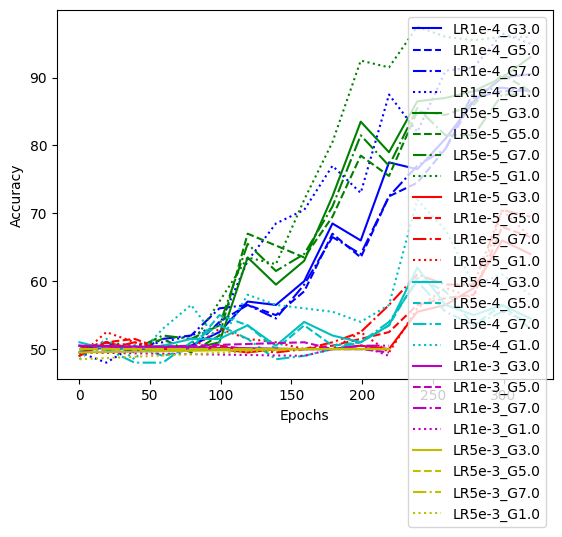

In [4]:

# loop over all scales
output = []
for learning_rate in LEARNING_RATES:
    for guidance_scale in GUIDANCE_SCALES:
        accept_checkpoints = []
        accept_scores = []
        for checkpoint in CHECKPOINTS:
            # check if both left and right exists
            left_file = COUNTING_FILE.format(LEFT_NAME,guidance_scale, learning_rate, checkpoint)
            right_file = COUNTING_FILE.format(RIGHT_NAME,guidance_scale, learning_rate, checkpoint)
            if os.path.exists(left_file) and os.path.exists(right_file):
                with open(left_file, 'r') as f:
                    left = json.load(f)
                with open(right_file, 'r') as f:
                    right = json.load(f)
                accept_checkpoints.append(checkpoint)
                accept_scores.append((left['left'] + right['right'])/2)
                output.append({'learning_rate': learning_rate, 'guidance_scale': guidance_scale, 'checkpoint': checkpoint, 'score': (left['left'] + right['right'])/2})
        # if there is any checkpoints, plot the graph, make line style difference for each learning rate
        if len(accept_checkpoints) > 0:
            plt.plot(accept_checkpoints, accept_scores, label="LR{}_G{}".format(learning_rate,guidance_scale), linestyle=LINE_STYLES[GUIDANCE_SCALES.index(guidance_scale)], color=COLORS[LEARNING_RATES.index(learning_rate)])
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [6]:
# sort the output by score
output = sorted(output, key=lambda x: x['score'], reverse=True)

[{'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 239, 'score': 97.5}, {'learning_rate': '1e-4', 'guidance_scale': '1.0', 'checkpoint': 299, 'score': 96.5}, {'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 259, 'score': 96.0}, {'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 299, 'score': 96.0}, {'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 319, 'score': 96.0}, {'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 279, 'score': 95.5}, {'learning_rate': '1e-4', 'guidance_scale': '1.0', 'checkpoint': 319, 'score': 95.0}, {'learning_rate': '5e-5', 'guidance_scale': '3.0', 'checkpoint': 319, 'score': 93.0}, {'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 199, 'score': 92.5}, {'learning_rate': '1e-4', 'guidance_scale': '1.0', 'checkpoint': 279, 'score': 91.5}]


# TOP 10 accuracy

In [7]:
for out in output[:10]:
    print(out)

{'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 239, 'score': 97.5}
{'learning_rate': '1e-4', 'guidance_scale': '1.0', 'checkpoint': 299, 'score': 96.5}
{'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 259, 'score': 96.0}
{'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 299, 'score': 96.0}
{'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 319, 'score': 96.0}
{'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 279, 'score': 95.5}
{'learning_rate': '1e-4', 'guidance_scale': '1.0', 'checkpoint': 319, 'score': 95.0}
{'learning_rate': '5e-5', 'guidance_scale': '3.0', 'checkpoint': 319, 'score': 93.0}
{'learning_rate': '5e-5', 'guidance_scale': '1.0', 'checkpoint': 199, 'score': 92.5}
{'learning_rate': '1e-4', 'guidance_scale': '1.0', 'checkpoint': 279, 'score': 91.5}
